In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize, line_search, newton, rosen

### Problem One: Simple convex function

In [95]:
def convex(x):
    return np.exp(x.T  @ x)

def gradient(x):
    grad = [2*x[i] * convex(x) for i in range(len(x))]
    return np.array(grad)

def hessian(x):
    hessian = np.zeros(len(x), len(x))
    for i in range(len(x)):
        for j in range(len(x)):
            if i==j:
                hessian[i,j] = (4*x[i]^2 + 2) * convex(x)
            else:
                hessian[i,j] = (4*x[j]*x[i]) * convex(x)
    return hessian

def convex_1D(x):
    return np.exp(x**2)

def der_1d(x):
    return 2*x * np.exp(x**2)

def der_2_1d(x):
    return (4*x+2)* np.exp(x**2)

#### BFGS with and without gradient

In [65]:
# Iterate 100 times sampling an input 
np.random.seed(1)

without_grad = []
with_grad = []
for i in range(100):
    
    x = np.random.uniform(-2.5, 2.5, size = (3,1))
    wg = minimize(convex, x, method='BFGS', jac = gradient, 
    options={'return_all': False, 'maxiter' : 10})
    wout_g = minimize(convex, x, method='BFGS', jac = None, 
    options={'return_all': False, 'maxiter' : 10})
    
    if wg.nit == 10 and wout_g.nit == 10:
        with_grad.append(wg)
        without_grad.append(wout_g)
        

In [67]:
#Extract values to create a df
fun_val_wout_grad = list(map(lambda x : x.fun, without_grad))
fun_val_w_grad = list(map(lambda x : x.fun, with_grad))

x_dist_wout_grad = list(map(lambda x : np.linalg.norm(x.x), without_grad))
x_dist_w_grad = list(map(lambda x : np.linalg.norm(x.x), with_grad))

eval_wout_grad = list(map(lambda x : x.nfev, without_grad))
eval_w_grad = list(map(lambda x : x.nfev+x.njev, with_grad))



In [68]:
df = pd.DataFrame(data=[fun_val_w_grad, fun_val_wout_grad, x_dist_w_grad, 
                 x_dist_wout_grad, eval_w_grad, eval_wout_grad]).T
df.columns = ["F_val", "F_val_wout_grad", "x_dist", "x_dist_wout_grad", "eval_wout_grad", "eval_w_grad"]

In [70]:
df.head()

,F_val,F_val_wout_grad,x_dist,x_dist_wout_grad,eval_wout_grad,eval_w_grad
0,1.025188,1.352354,0.157721,0.549406,24.0,52.0
1,1.134156,2.072584,0.354809,0.853696,24.0,56.0
2,5.368044,18.613654,1.296327,1.709940,32.0,64.0
3,1.040188,1.963441,0.198498,0.821400,24.0,52.0
4,1.005276,1.095002,0.072542,0.301258,24.0,52.0


In [75]:
df.describe()

,F_val,F_val_wout_grad,x_dist,x_dist_wout_grad,eval_wout_grad,eval_w_grad
count,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000
mean,6.363699,27.152862,4.302272e-01,0.643978,25.558824,56.352941
std,24.997802,134.116108,5.625206e-01,0.687143,2.673152,11.030169
min,1.000000,1.000000,8.788446e-10,0.000139,24.000000,48.000000
25%,1.000013,1.000284,3.590497e-03,0.016859,24.000000,48.000000
50%,1.058189,1.270214,2.377139e-01,0.489058,24.000000,52.000000
75%,1.622127,2.904601,6.953543e-01,1.027600,26.000000,61.000000
max,167.140296,944.717702,2.262484e+00,2.617420,36.000000,96.000000


In [78]:
#Find where the approximation method outperformed
df.loc[df.F_val > df.F_val_wout_grad]

,F_val,F_val_wout_grad,x_dist,x_dist_wout_grad,eval_wout_grad,eval_w_grad


### NM vs BFGS

In [116]:
# Iterate 100 times sampling an input 
np.random.seed(1)

bf = []
nm = []
for i in range(100):
    
    x = np.random.uniform(-2.5, 2.5, size = (3,1))
    b = minimize(convex, x, method='BFGS', jac = None, 
    options={'return_all': False, 'maxiter' : 10})
    n = minimize(convex, x, method='Nelder-Mead', jac = None, 
    options={'return_all': False, 'maxfev' : b.nfev})
    bf.append(b)
    nm.append(n)
    
#Extract values to create a df
fun_val_bf = list(map(lambda x : x.fun, bf))
fun_val_nm = list(map(lambda x : x.fun, nm))

x_dist_bf = list(map(lambda x : np.linalg.norm(x.x), bf))
x_dist_nm = list(map(lambda x : np.linalg.norm(x.x), nm))

df = pd.DataFrame(data=[fun_val_bf, fun_val_nm, x_dist_bf, 
                 x_dist_nm]).T
df.columns = ["F_val_BFGS", "F_val_NM", "x_dist_BFGS", "x_dist_NM"]
df

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM
0,1.352354,1.214463,5.494058e-01,0.440797
1,2.072584,2.204492,8.536956e-01,0.889099
2,1.000000,1.350916,3.891599e-08,0.548437
3,1.000000,1.328891,5.543343e-08,0.533240
4,18.613654,1.000857,1.709940e+00,0.029271
...,...,...,...,...
95,1.000000,1.087926,1.647295e-04,0.290298
96,1.000000,1.185286,1.160252e-07,0.412291
97,1.000000,1.135874,2.146024e-07,0.356934
98,1.000000,1.411353,1.392705e-04,0.586983


In [115]:
df.describe()

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM
count,100.000000,100.000000,1.000000e+02,100.000000
mean,18.783947,1.357748,4.379823e-01,0.441226
std,111.011009,0.431605,6.408041e-01,0.270261
min,1.000000,1.000004,7.976005e-09,0.001975
25%,1.000000,1.037403,1.253732e-04,0.191596
50%,1.000310,1.233946,1.758666e-02,0.458495
75%,1.841306,1.463807,7.811853e-01,0.617043
max,944.717702,3.221613,2.617420e+00,1.081611


In [130]:
df["log F BFGS"] = np.log(df["F_val_BFGS"])
df["log F NM"] = np.log(df["F_val_NM"])
df['trial'] = df.index

bfgs = df[["trial", "F_val_BFGS", "x_dist_BFGS", "log F BFGS"]]
nm = df[["trial", "F_val_NM", "x_dist_NM", "log F NM"]]
bfgs["Method"] = "BFGS"
nm["Method"] = "NM"
bfgs.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
nm.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
stacked_df = pd.concat([nm, bfgs], axis= 0)
stacked_df.head()

/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfgs["Method"] = "BFGS"
/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm["Method"] = "NM"


,trial,F_val,x_dist,log F,Method
0,0,1.214463,0.440797,0.194302,NM
1,1,2.204492,0.889099,0.790497,NM
2,2,1.350916,0.548437,0.300783,NM
3,3,1.328891,0.533240,0.284345,NM
4,4,1.000857,0.029271,0.000857,NM


<AxesSubplot:xlabel='trial', ylabel='log F'>

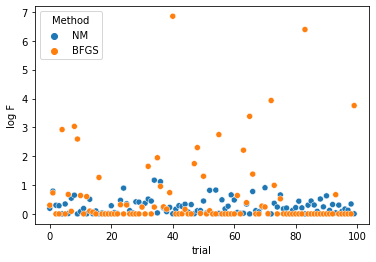

In [131]:
sns.scatterplot(data=stacked_df, x="trial", y = "log F", hue="Method")

### Repeat previous with 20 iterations

In [137]:
# Iterate 100 times sampling an input 
np.random.seed(1)

bf = []
nm = []
for i in range(100):
    
    x = np.random.uniform(-2.5, 2.5, size = (3,1))
    b = minimize(convex, x, method='BFGS', jac = None, 
    options={'return_all': False, 'maxiter' : 20})
    n = minimize(convex, x, method='Nelder-Mead', jac = None, 
    options={'return_all': False, 'maxfev' : b.nfev})
    bf.append(b)
    nm.append(n)
    
#Extract values to create a df
fun_val_bf = list(map(lambda x : x.fun, bf))
fun_val_nm = list(map(lambda x : x.fun, nm))

x_dist_bf = list(map(lambda x : np.linalg.norm(x.x), bf))
x_dist_nm = list(map(lambda x : np.linalg.norm(x.x), nm))

df = pd.DataFrame(data=[fun_val_bf, fun_val_nm, x_dist_bf, 
                 x_dist_nm]).T
df.columns = ["F_val_BFGS", "F_val_NM", "x_dist_BFGS", "x_dist_NM"]
df.describe()

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM
count,100.000000,100.000000,1.000000e+02,100.000000
mean,1.033249,1.117853,2.486635e-02,0.221595
std,0.238336,0.176396,1.384502e-01,0.228450
min,1.000000,1.000000,7.052519e-09,0.000040
25%,1.000000,1.000179,3.157768e-07,0.013249
50%,1.000000,1.011869,2.016529e-06,0.107515
75%,1.000000,1.209412,5.678977e-04,0.436025
max,3.057117,1.870666,1.057106e+00,0.791388


In [136]:
df.describe()

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM,log F BFGS,log F NM,trial
count,100.000000,100.000000,1.000000e+02,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,1.033249,1.117853,2.486635e-02,0.221595,1.959511e-02,1.007721e-01,49.500000
std,0.238336,0.176396,1.384502e-01,0.228450,1.367304e-01,1.415289e-01,29.011492
min,1.000000,1.000000,7.052519e-09,0.000040,0.000000e+00,1.623097e-09,0.000000
25%,1.000000,1.000179,3.157768e-07,0.013249,9.964252e-14,1.785408e-04,24.750000
50%,1.000000,1.011869,2.016529e-06,0.107515,4.066303e-12,1.179398e-02,49.500000
75%,1.000000,1.209412,5.678977e-04,0.436025,3.229881e-07,1.901299e-01,74.250000
max,3.057117,1.870666,1.057106e+00,0.791388,1.117472e+00,6.262943e-01,99.000000


In [134]:
df["log F BFGS"] = np.log(df["F_val_BFGS"])
df["log F NM"] = np.log(df["F_val_NM"])
df['trial'] = df.index

bfgs = df[["trial", "F_val_BFGS", "x_dist_BFGS", "log F BFGS"]]
nm = df[["trial", "F_val_NM", "x_dist_NM", "log F NM"]]
bfgs["Method"] = "BFGS"
nm["Method"] = "NM"
bfgs.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
nm.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
stacked_df = pd.concat([nm, bfgs], axis= 0)
stacked_df.head()

/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfgs["Method"] = "BFGS"
/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm["Method"] = "NM"


,trial,F_val,x_dist,log F,Method
0,0,1.003355,0.057871,0.003349,NM
1,1,1.000362,0.019012,0.000361,NM
2,2,1.350916,0.548437,0.300783,NM
3,3,1.328891,0.533240,0.284345,NM
4,4,1.000001,0.001067,0.000001,NM


<AxesSubplot:xlabel='trial', ylabel='log F'>

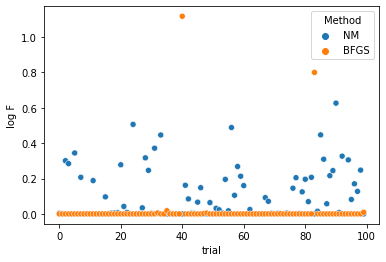

In [135]:
sns.scatterplot(data=stacked_df, x="trial", y = "log F", hue="Method")

### RosenBrock Function

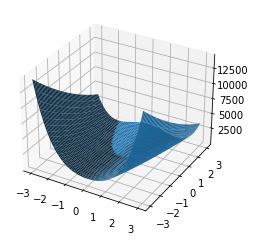

In [148]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-3, 3, 500)

X, Y = np.meshgrid(x, x)

ax = plt.subplot(111, projection='3d')

ax.plot_surface(X, Y, rosen([X, Y]))

plt.show()

In [155]:
# Iterate 100 times sampling an input 
np.random.seed(1)

bf = []
nm = []
for i in range(100):
    
    x = np.random.uniform(-2.5, 2.5, size = (2,1))
    b = minimize(rosen, x, method='BFGS', jac = None, 
    options={'return_all': False, 'maxiter' : 50})
    n = minimize(rosen, x, method='Nelder-Mead', jac = None, 
    options={'return_all': False, 'maxfev' : b.nfev})
    bf.append(b)
    nm.append(n)
    
#Extract values to create a df
fun_val_bf = list(map(lambda x : x.fun, bf))
fun_val_nm = list(map(lambda x : x.fun, nm))

x_dist_bf = list(map(lambda x : np.linalg.norm(x.x), bf))
x_dist_nm = list(map(lambda x : np.linalg.norm(x.x), nm))

df = pd.DataFrame(data=[fun_val_bf, fun_val_nm, x_dist_bf, 
                 x_dist_nm]).T
df.columns = ["F_val_BFGS", "F_val_NM", "x_dist_BFGS", "x_dist_NM"]
df.describe()

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM
count,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,1.856085e-03,2.171360e-02,1.396175,1.302812
std,9.997684e-03,5.323942e-02,0.078285,0.227258
min,4.000564e-13,1.054386e-10,0.948465,0.578726
25%,1.869540e-11,5.220811e-10,1.414204,1.346701
50%,2.005458e-11,3.380915e-08,1.414204,1.414185
75%,2.242717e-11,3.878825e-03,1.414205,1.414247
max,6.422597e-02,2.615587e-01,1.415914,1.701979


In [156]:
df["log F BFGS"] = np.log(df["F_val_BFGS"])
df["log F NM"] = np.log(df["F_val_NM"])
df['trial'] = df.index

bfgs = df[["trial", "F_val_BFGS", "x_dist_BFGS", "log F BFGS"]]
nm = df[["trial", "F_val_NM", "x_dist_NM", "log F NM"]]
bfgs["Method"] = "BFGS"
nm["Method"] = "NM"
bfgs.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
nm.columns = ["trial", "F_val", "x_dist", "log F", "Method"]
stacked_df = pd.concat([nm, bfgs], axis= 0)
stacked_df.head()

/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bfgs["Method"] = "BFGS"
/var/folders/mw/zjnlbssx75vcv_pwh461tw500000gn/T/ipykernel_20397/3246575286.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nm["Method"] = "NM"


,trial,F_val,x_dist,log F,Method
0,0,1.325680e-06,1.414368,-13.533585,NM
1,1,2.327836e-10,1.414183,-22.180912,NM
2,2,1.953149e-10,1.414243,-22.356408,NM
3,3,1.739258e-07,1.414943,-15.564637,NM
4,4,3.884913e-02,1.037070,-3.248070,NM


<AxesSubplot:xlabel='trial', ylabel='log F'>

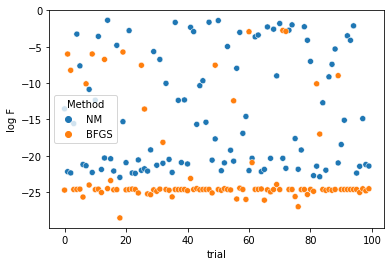

In [157]:
sns.scatterplot(data=stacked_df, x="trial", y = "log F", hue="Method")

In [161]:
df.loc[df.F_val_BFGS < df.F_val_NM]

,F_val_BFGS,F_val_NM,x_dist_BFGS,x_dist_NM,log F BFGS,log F NM,trial
0,1.840197e-11,1.325680e-06,1.414204,1.414368,-24.718563,-13.533585,0
3,2.005541e-11,1.739258e-07,1.414204,1.414943,-24.632522,-15.564637,3
4,2.035050e-11,3.884913e-02,1.414204,1.037070,-24.617916,-3.248070,4
5,2.103783e-11,4.902905e-04,1.414204,1.371088,-24.584699,-7.620512,5
6,7.084367e-12,6.246772e-10,1.414209,1.414199,-25.673131,-21.193786,6
...,...,...,...,...,...,...,...
95,2.006581e-11,1.914687e-10,1.414204,1.414243,-24.632004,-22.376297,95
96,1.328951e-11,4.863883e-10,1.414207,1.414233,-25.044046,-21.444014,96
97,2.204371e-11,3.449780e-07,1.414204,1.415174,-24.537994,-14.879785,97
98,1.664618e-11,6.211876e-10,1.414205,1.414266,-24.818840,-21.199388,98
